In [ ]:
def total_movements(input_travels):
    

In [82]:
def simple_plot(input_MSA, beginDate, endDate):
    cases = pd.read_csv('./data/output.csv')

    row = cases.loc[cases['name_msa'] == input_MSA]
    plt.figure(0)
    
    list_cases = list(row['cases'])
    
    plt.plot(row['interval_start'], row['cases'])
    plt.title('Covid-19 cases at ' + input_MSA + ',' + str(beginDate) + '-' + str(endDate)) 
    travels = pd.read_csv('./MSA_travel_aggregate_code/output.csv')

    
    list_travels = []
    for index, row in travels.iterrows():
        if (row['name_msa'] == input_MSA):
            list_travels =  list(row)
            list_travels.pop(0)
            dates = list(travels)
            dates.pop(0)
            plt.figure(1)
            plt.plot(dates, list_travels)
            plt.title('travelers to ' + input_MSA + ','  + str(beginDate) + '-' + str(endDate))
            break
            
    diff = 57
    #print(len(list_travels))
    for i in range(diff):
        #print(i)
        list_travels.pop(i)
            
    #print(len(list_travels), len(list_cases))
#     for i in range(14):
#         list_cases.insert(i, 0)
#     for i in range(14):
#         list_travels.append(0)
    
    plt.figure(3)
    plt.scatter(list_travels, list_cases)
    
    list_travels = pd.Series(list_travels)
    list_cases = pd.Series(list_cases)
    print(list_travels.corr(list_cases))
    return list_travels, list_cases
            
   

In [83]:
def linear_regression(list_travels, list_cases):
    regr = linear_model.LinearRegression()
    #list_travels.reshape(-1, 1)
    
    list_travels_re = []
    for travel in list_travels:
        travel_list = []
        travel_list.append(travel)
        list_travels_re.append(travel_list)
    print(list_travels_re)

    regr.fit(list_travels_re, list_cases)
    
    m, b = np.polyfit(list_travels, list_cases, 1)
    plt.plot(list_travels, m*list_travels + b, color = 'black')
    plt.xlabel("Number of incoming travelers")
    plt.ylabel("Number of Covid-19 cases")
    

Epoch 1/100
 - 2s - loss: 0.2221
Epoch 2/100
 - 0s - loss: 0.1574
Epoch 3/100
 - 0s - loss: 0.1125
Epoch 4/100
 - 0s - loss: 0.0844
Epoch 5/100
 - 1s - loss: 0.0674
Epoch 6/100
 - 0s - loss: 0.0570
Epoch 7/100
 - 0s - loss: 0.0493
Epoch 8/100
 - 0s - loss: 0.0427
Epoch 9/100
 - 1s - loss: 0.0367
Epoch 10/100
 - 0s - loss: 0.0308
Epoch 11/100
 - 0s - loss: 0.0253
Epoch 12/100
 - 0s - loss: 0.0207
Epoch 13/100
 - 1s - loss: 0.0165
Epoch 14/100
 - 1s - loss: 0.0131
Epoch 15/100
 - 1s - loss: 0.0105
Epoch 16/100
 - 1s - loss: 0.0083
Epoch 17/100
 - 1s - loss: 0.0069
Epoch 18/100
 - 1s - loss: 0.0061
Epoch 19/100
 - 1s - loss: 0.0054
Epoch 20/100
 - 1s - loss: 0.0051
Epoch 21/100
 - 1s - loss: 0.0049
Epoch 22/100
 - 1s - loss: 0.0048
Epoch 23/100
 - 1s - loss: 0.0049
Epoch 24/100
 - 1s - loss: 0.0048
Epoch 25/100
 - 1s - loss: 0.0049
Epoch 26/100
 - 1s - loss: 0.0047
Epoch 27/100
 - 1s - loss: 0.0048
Epoch 28/100
 - 1s - loss: 0.0048
Epoch 29/100
 - 1s - loss: 0.0047
Epoch 30/100
 - 1s - lo

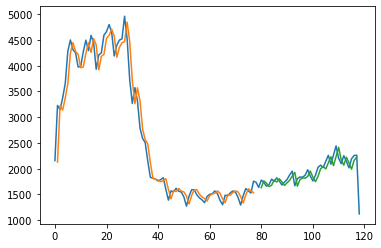

In [126]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import tensorflow as tf
import math
import numpy as np


if __name__ == "__main__":
    
    beginDate = dt.datetime(2020, 4, 18)
    endDate = dt.datetime(2020, 6, 18)
    #travels, cases = simple_plot('New York-Newark-Jersey City', beginDate, endDate)
    
    #linear_regression_test(travels, cases)
    
    
    LSTM_test()
    

In [124]:
def LSTM_test():
      
    # convert an array of values into a dataset matrix
    def create_dataset(dataset, look_back=1):
        dataX, dataY = [], []
        for i in range(len(dataset)-look_back-1):
            a = dataset[i:(i+look_back), 0]
            dataX.append(a)
            dataY.append(dataset[i + look_back, 0])
        return numpy.array(dataX), numpy.array(dataY)
    # fix random seed for reproducibility
    numpy.random.seed(7)
    # load the dataset
    dataframe = read_csv('test_new_york_LSTM.csv', usecols=[1], engine='python')
    dataset = dataframe.values
    dataset = dataset.astype('float32')
    # normalize the dataset
    scaler = MinMaxScaler(feature_range=(0, 1))
    dataset = scaler.fit_transform(dataset)
    # split into train and test sets
    train_size = int(len(dataset) * 0.67)
    test_size = len(dataset) - train_size
    train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
    # reshape into X=t and Y=t+1
    look_back = 1
    trainX, trainY = create_dataset(train, look_back)
    testX, testY = create_dataset(test, look_back)
    # reshape input to be [samples, time steps, features]
    trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
    # create and fit the LSTM network
    model = Sequential()
    model.add(LSTM(4, input_shape=(1, look_back)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
    # make predictions
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)
    # invert predictions
    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform([trainY])
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform([testY])
    # calculate root mean squared error
    trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
    print('Train Score: %.2f RMSE' % (trainScore))
    testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
    print('Test Score: %.2f RMSE' % (testScore))
    # shift train predictions for plotting
    trainPredictPlot = numpy.empty_like(dataset)
    trainPredictPlot[:, :] = numpy.nan
    trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
    # shift test predictions for plotting
    testPredictPlot = numpy.empty_like(dataset)
    testPredictPlot[:, :] = numpy.nan
    testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
    # plot baseline and predictions
    plt.plot(scaler.inverse_transform(dataset))
    plt.plot(trainPredictPlot)
    plt.plot(testPredictPlot)
    plt.show()

In [122]:
def linear_regression_test(list_travels, list_cases):
    
    regr = linear_model.LinearRegression()
    #list_travels.reshape(-1, 1)
    
    list_travels_re = []
    for travel in list_travels:
        travel_list = []
        travel_list.append(travel)
        list_travels_re.append(travel_list)
    print(list_travels_re)
    
    diabetes_X = list_travels_re
    diabetes_y = list_cases
    
    # Load the diabetes dataset
#     diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

   # print(diabetes_y)

    # Use only one feature
#     diabetes_X = diabetes_X[:, np.newaxis, 2]

    # Split the data into training/testing sets
    diabetes_X_train = diabetes_X[:-20]
    diabetes_X_test = diabetes_X[-20:]

    # Split the targets into training/testing sets
    diabetes_y_train = diabetes_y[:-20]
    diabetes_y_test = diabetes_y[-20:]

    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    print(diabetes_y_train)
    regr.fit(diabetes_X_train, diabetes_y_train)

    # Make predictions using the testing set
    diabetes_y_pred = regr.predict(diabetes_X_test)

    # The coefficients
    print('Coefficients: \n', regr.coef_)
    # The mean squared error
    print('Mean squared error: %.2f'
          % mean_squared_error(diabetes_y_test, diabetes_y_pred))
    # The coefficient of determination: 1 is perfect prediction
    print('Coefficient of determination: %.2f'
          % r2_score(diabetes_y_test, diabetes_y_pred))

    # Plot outputs
    plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
    plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

    plt.xticks(())
    plt.yticks(())

    plt.show()